***Credit Card Fraud Detector***

Load and Prepare Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix

test_df = pd.read_csv('fraudTest.csv')
train_df = pd.read_csv('fraudTrain.csv')
train_df.head(20)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [2]:
train_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [3]:
train_df.shape

(1296675, 23)

In [4]:
train_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [5]:
fraud = train_df[train_df['is_fraud'] == 1]['is_fraud'].count()
not_fraud = train_df[train_df['is_fraud'] == 0]['is_fraud'].count()

print("Number of Frauds: ",fraud)
print(f"{round(fraud/train_df['is_fraud'].count(), 4)*100}%")
print("Number of Not Fraud: ",not_fraud)
print(f"{round(not_fraud/train_df['is_fraud'].count(), 4)*100}%")

Number of Frauds:  7506
0.58%
Number of Not Fraud:  1289169
99.42%


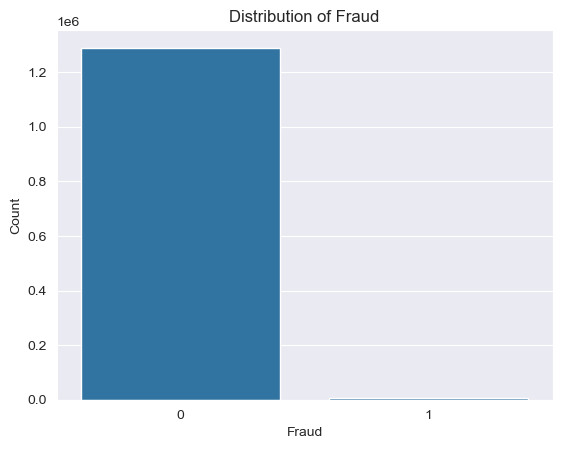

In [6]:
fraud_counts=train_df['is_fraud'].value_counts()
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('Distribution of Fraud')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

Data Preprocessing

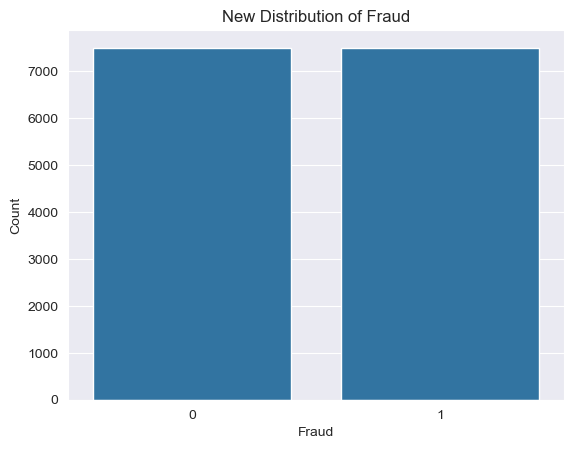

In [7]:
fraud=train_df[train_df["is_fraud"]==1]
not_fraud=train_df[train_df["is_fraud"]==0]

not_fraud=not_fraud.sample(fraud.shape[0])
data=pd.concat([fraud,not_fraud])

fraud_counts=data['is_fraud'].value_counts()
sns.barplot(x=fraud_counts.index,y=fraud_counts.values)
plt.title('New Distribution of Fraud')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

In [8]:
unused_cols=['first','last','unix_time','street','city','state','gender','job','dob','trans_num','merchant']
data.drop(columns=unused_cols,inplace=True)

Encode Variables

In [9]:
encoder=LabelEncoder()
data['category']=encoder.fit_transform(data['category'])
data['cc_num']=encoder.fit_transform(data['cc_num'])
data.head(20)

,Unnamed: 0,trans_date_trans_time,cc_num,category,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
2449,2449,2019-01-02 01:06:37,122,4,281.06,28611,35.9946,-81.7266,885,36.430124,-81.179483,1
2472,2472,2019-01-02 01:47:29,303,2,11.52,78208,29.4400,-98.4590,1595797,29.819364,-99.142791,1
2523,2523,2019-01-02 03:05:23,303,4,276.31,78208,29.4400,-98.4590,1595797,29.273085,-98.836360,1
2546,2546,2019-01-02 03:38:03,122,2,7.03,28611,35.9946,-81.7266,885,35.909292,-82.091010,1
2553,2553,2019-01-02 03:55:47,303,4,275.73,78208,29.4400,-98.4590,1595797,29.786426,-98.683410,1
2937,2937,2019-01-02 13:38:08,122,11,844.80,28611,35.9946,-81.7266,885,35.987802,-81.254332,1
3527,3527,2019-01-02 23:52:08,122,8,843.91,28611,35.9946,-81.7266,885,35.985612,-81.383306,1
3580,3580,2019-01-03 01:05:27,303,2,10.76,78208,29.4400,-98.4590,1595797,28.856712,-97.794207,1
3600,3600,2019-01-03 01:35:52,303,4,332.35,78208,29.4400,-98.4590,1595797,29.320662,-97.937219,1
3671,3671,2019-01-03 03:17:36,303,4,315.34,78208,29.4400,-98.4590,1595797,28.953283,-97.806528,1


Feature Engineering

In [10]:
data['trans_date_trans_time']=pd.to_datetime(data['trans_date_trans_time'])
data['trans_day']=data['trans_date_trans_time'].dt.day
data['trans_month']=data['trans_date_trans_time'].dt.month
data['trans_year']=data['trans_date_trans_time'].dt.year
data['trans_hour']=data['trans_date_trans_time'].dt.hour
data['trans_minute']=data['trans_date_trans_time'].dt.minute
data.drop(columns=['trans_date_trans_time'],inplace=True)

Feature Scaling


In [11]:
scaler=StandardScaler()
data['amt']=scaler.fit_transform(data[['amt']])
data['zip']=scaler.fit_transform(data[['zip']])
data['city_pop']=scaler.fit_transform(data[['city_pop']])
data['cc_num']=encoder.fit_transform(data['cc_num'])
data.head()

,Unnamed: 0,cc_num,category,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_day,trans_month,trans_year,trans_hour,trans_minute
2449,2449,122,4,-0.048844,-0.736575,35.9946,-81.7266,-0.295014,36.430124,-81.179483,1,2,1,2019,1,6
2472,2472,303,2,-0.775086,1.098355,29.4400,-98.4590,4.876893,29.819364,-99.142791,1,2,1,2019,1,47
2523,2523,303,4,-0.061642,1.098355,29.4400,-98.4590,4.876893,29.273085,-98.836360,1,2,1,2019,3,5
2546,2546,122,2,-0.787184,-0.736575,35.9946,-81.7266,-0.295014,35.909292,-82.091010,1,2,1,2019,3,38
2553,2553,303,4,-0.063205,1.098355,29.4400,-98.4590,4.876893,29.786426,-98.683410,1,2,1,2019,3,55


In [12]:
X=data.drop('is_fraud',axis=1)
y=data['is_fraud']

Split the Data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

Build and Train different Models

1. Random Forest

In [14]:
RFC=RandomForestClassifier(random_state=0)
RFC.fit(X_train,y_train)
y_pred=RFC.predict(X_test)

Evaluate the Model

In [15]:
print('Accuracy:',accuracy_score(y_test, y_pred))
print('Precision:',precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))
print('Confusion matrix:',confusion_matrix(y_test, y_pred))

Accuracy: 0.961038961038961
Precision: 0.9638472032742156
Recall: 0.956668923493568
F1 score: 0.9602446483180428
Confusion matrix: [[1473   53]
 [  64 1413]]


Text(0.5, 1.0, 'Confusion Matrix')

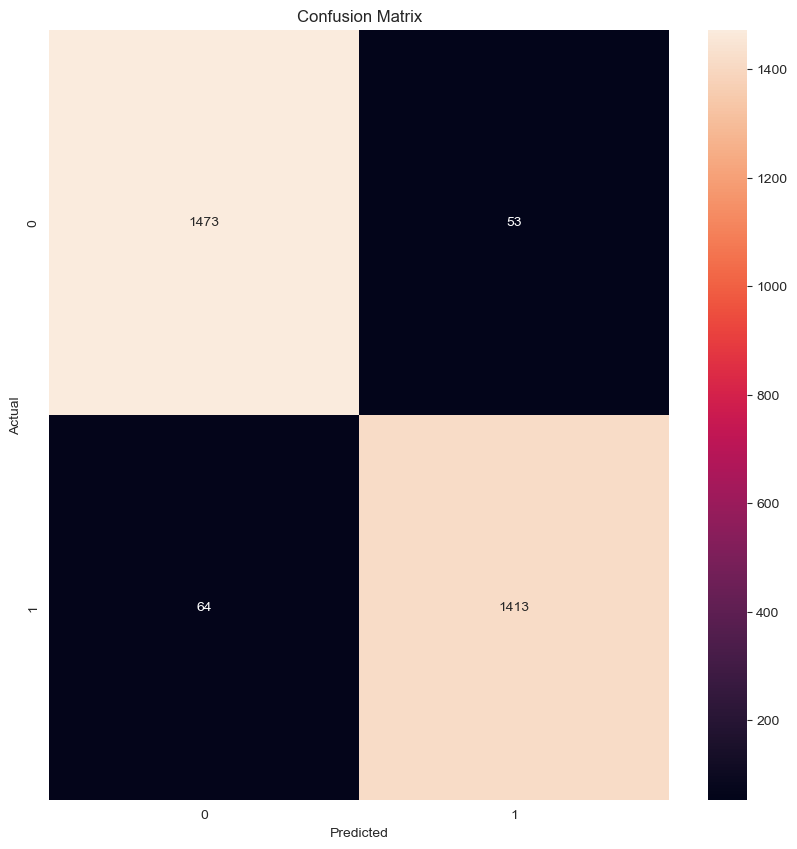

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

2. Logistic Regression

In [17]:
lr = LogisticRegression(solver='lbfgs', max_iter=100000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

Evaluate the Model

In [18]:
print('Accuracy:',accuracy_score(y_test, y_pred))
print('Precision:',precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))
print('Confusion matrix:',confusion_matrix(y_test, y_pred))

Accuracy: 0.8474858474858474
Precision: 0.9270746018440905
Recall: 0.7488151658767772
F1 score: 0.8284644194756554
Confusion matrix: [[1439   87]
 [ 371 1106]]


Text(0.5, 1.0, 'Confusion Matrix')

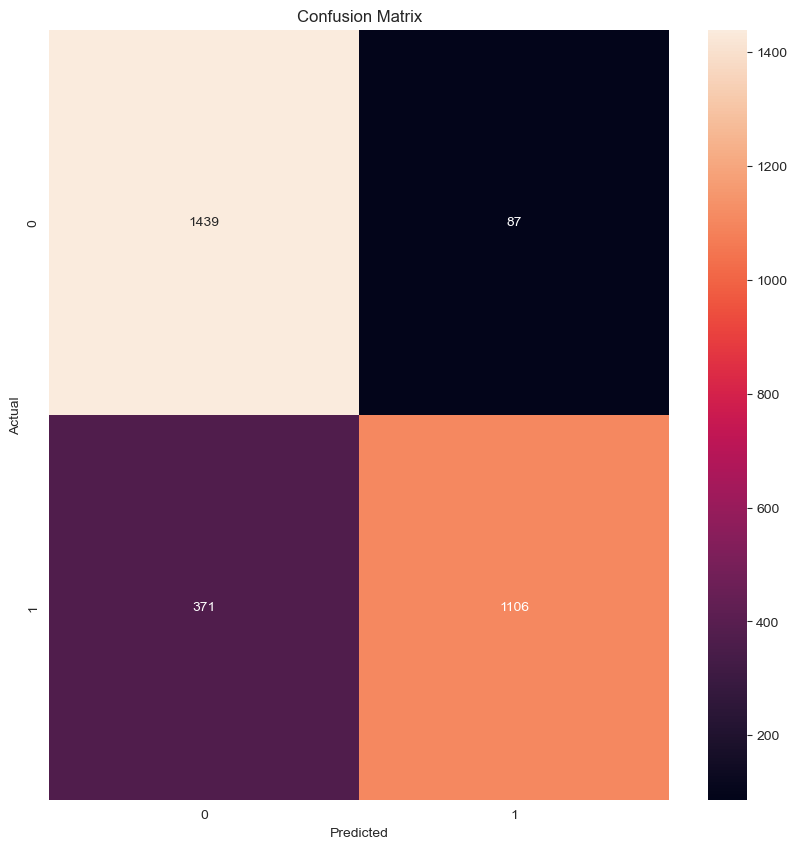

In [19]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

3. Support Vector Machines

In [20]:
sv = svm.SVC()
sv.fit(X_train,y_train)
y_pred=sv.predict(X_test)

Evaluate the Model

In [21]:
print('Accuracy:',accuracy_score(y_test, y_pred))
print('Precision:',precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))
print('Confusion matrix:',confusion_matrix(y_test, y_pred))

Accuracy: 0.5387945387945388
Precision: 0.5415913200723327
Recall: 0.40555179417738657
F1 score: 0.4638017808749516
Confusion matrix: [[1019  507]
 [ 878  599]]


Text(0.5, 1.0, 'Confusion Matrix')

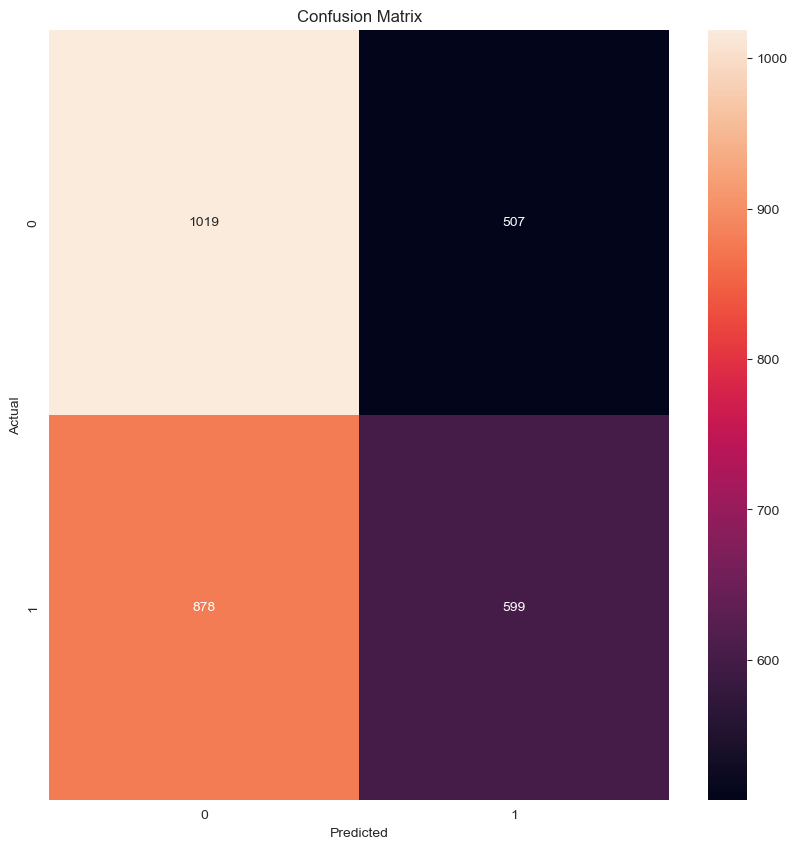

In [22]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

4. Decision Tree

In [23]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

Evaluate the Model

In [24]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('Confusion matrix:', confusion_matrix(y_test, y_pred))

Accuracy: 0.961038961038961
Precision: 0.9619565217391305
Recall: 0.9587000677048071
F1 score: 0.960325534079349
Confusion matrix: [[1470   56]
 [  61 1416]]


Text(0.5, 1.0, 'Confusion Matrix')

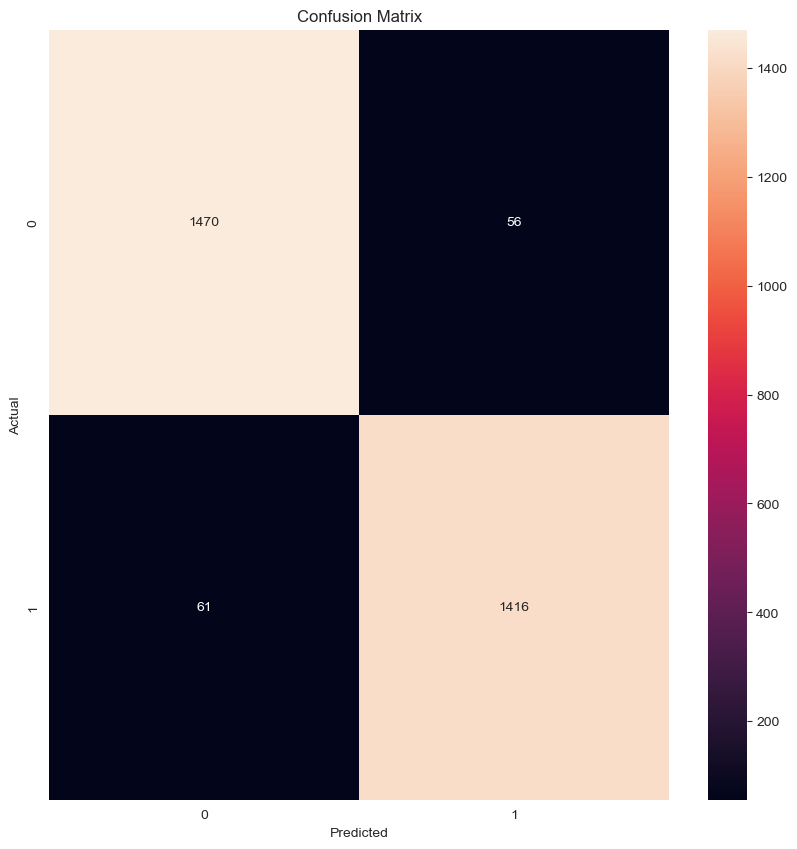

In [25]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

5. K-Nearest Neighbors

In [26]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)
y_pred=neigh.predict(X_test)

Evaluate the Model

In [27]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('Confusion matrix:', confusion_matrix(y_test, y_pred))

Accuracy: 0.7419247419247419
Precision: 0.7069575471698113
Recall: 0.8117806364251862
F1 score: 0.7557516545855657
Confusion matrix: [[1029  497]
 [ 278 1199]]


Text(0.5, 1.0, 'Confusion Matrix')

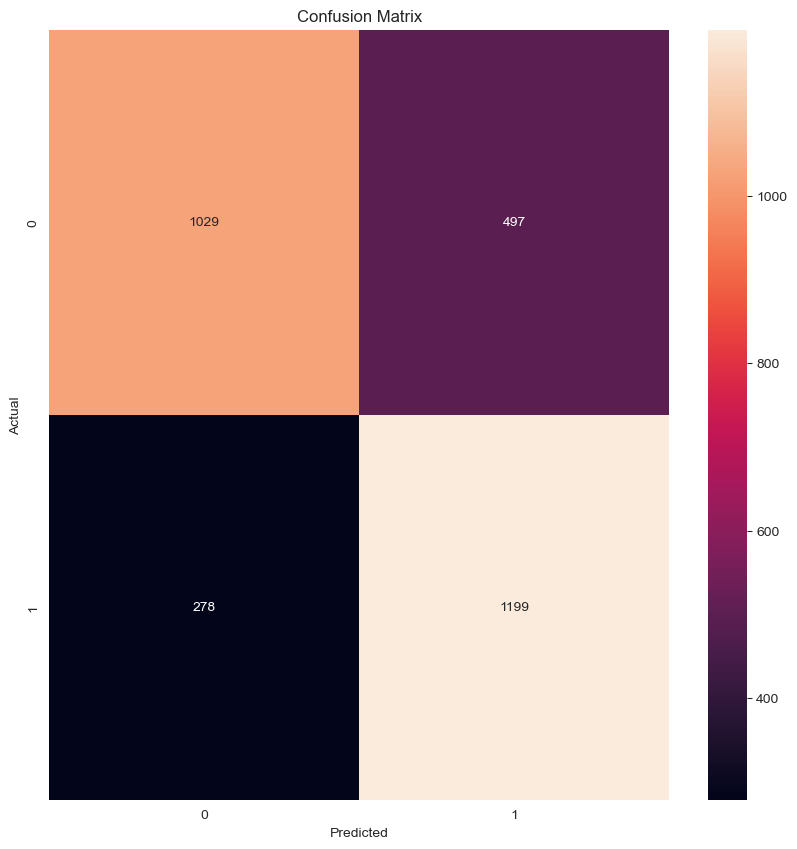

In [28]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')